Escriba un código similar a la interpolación lineal de la clase, pero que realice una interpolación cuadrática. Es decir, este código interpola usando una parábola para cada trío de puntos. Grafique sus resultados para el mismo ejemplo usado en la interpolación lineal.

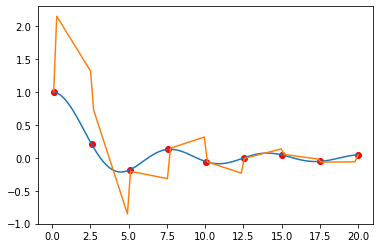

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# profe aun no termino el problema por que creo que me surgio un problema en la frontera de
# la interpolación cuadratica, primero utilice un [i+2] en los polinomios de lagrange pero se salia de los limites,
# por lo tanto ahora utilice [i-1] y [i+1] pero la grafica no es nada a lo que se busca

def find_ind(x, puntos):
    for i in range(len(puntos)):
        if x < puntos[i,0] and i != 0 :
            return i-1

def cuadr_interp(x, puntos):
    if x >= puntos[len(puntos)-1,0]:
        return puntos[len(puntos)-1,1]
    elif x <= puntos[0,0]:
        return puntos[0,1]
    
    i = find_ind(x, puntos)
    L1 = puntos[i-1][1]*(x - puntos[i][0])/(puntos[i-1][0] - puntos[i][0])
    L2 = puntos[i][1]*(x - puntos[i-1][0])/(puntos[i][0] - puntos[i-1][0])
    L3 = puntos[i-1][1]*(x - puntos[i+1][0])/(puntos[i-1][0] - puntos[i+1][0])
    L4 = puntos[i][1]*(x - puntos[i+1][0])/(puntos[i][0] - puntos[i+1][0]) 
    L5 = puntos[i+1][1]*(x - puntos[i-1][0])/(puntos[i+1][0] - puntos[i-1][0])
    L6 = puntos[i+1][1]*(x - puntos[i][0])/(puntos[i+1][0] - puntos[i][0])
    return  L1+L2+L3+L4+L5+L6




mini = 0.1
maxi = 20
order = 9
xp = np.linspace(mini, maxi, order)

puntos = np.array([[xi, np.sin(xi)/xi] for xi in xp])

x = np.linspace(mini, maxi, 100)
exact = np.sin(x)/x
# aplicamos la lineal
lin = [cuadr_interp(xi, puntos) for xi in x]

#graficamos
plt.scatter(puntos[:,0], puntos[:,1], color='red')
plt.plot(x, exact)
plt.plot(x, lin)

